**FACE MASK DETECTION**

In [1]:
!pip install kaggle

In [1]:
 #configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing Face Mask Dataset**

In [2]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 97% 159M/163M [00:01<00:00, 177MB/s]
100% 163M/163M [00:01<00:00, 160MB/s]


In [3]:
# extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
# to list the directories
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [4]:
import os # to access the files that we have
import numpy as np # to convert data into arrays
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow #function to show the image in a new window
from PIL import Image # to process the images
from sklearn.model_selection import train_test_split

In [13]:
# analysing the dataset
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5]) #displays the first 5 file names present in with_mask_files
print(with_mask_files[-5:]) #deisplays the last five file names present in the with_mask_files

['with_mask_2729.jpg', 'with_mask_3304.jpg', 'with_mask_2350.jpg', 'with_mask_610.jpg', 'with_mask_227.jpg']
['with_mask_2354.jpg', 'with_mask_3393.jpg', 'with_mask_3534.jpg', 'with_mask_3172.jpg', 'with_mask_2491.jpg']


In [14]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1541.jpg', 'without_mask_660.jpg', 'without_mask_441.jpg', 'without_mask_50.jpg', 'without_mask_2808.jpg']
['without_mask_2388.jpg', 'without_mask_2748.jpg', 'without_mask_2635.jpg', 'without_mask_1429.jpg', 'without_mask_1268.jpg']


In [15]:
# count the no of elements present in the particular directory
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask --> 1

without mask --> 0

In [16]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [17]:
#printing the first 5 elements of both the lists to check the labels
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [18]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [19]:
#concatenating the list and storing it in the form of one variable (labels)
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5]) #first 5 values of combined list
print(labels[-5:]) #last 5 values of combined list

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

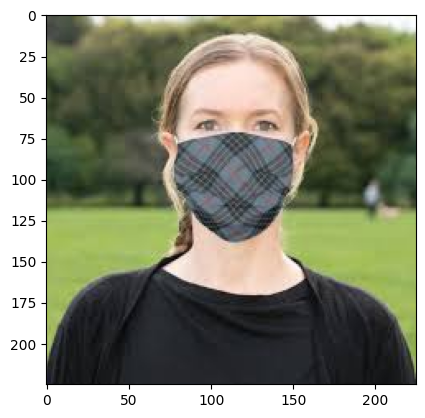

In [20]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_849.jpg')
image = mpimg.imread('/content/data/with_mask/with_mask_2505.jpg')

imgplot = plt.imshow(img) #function to read the img in the form of an array
imgplot =plt.imshow(image)
plt.show()

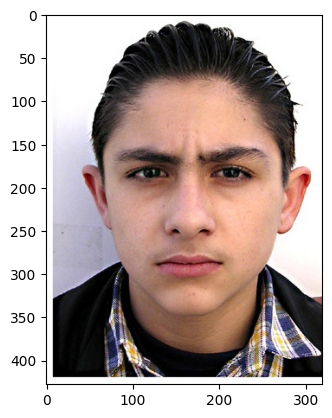

In [21]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1088.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**



1.   Resize the Images
2.   Convert the images to numpy arrays


In [22]:
#convert images to numpy arrays:

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file) # reading the images (from  the data of file with_mask_path and accessing files from it)
  image = image.resize((128,128)) #giving the dimensions of the image (can be (224,224) also)
  image = image.convert('RGB') # since half of the images might be black and white , so we convert it into coloured format
  image = np.array(image) # converting the image to numpy array
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [23]:
len(data)

7553

In [24]:
type(data)

list

array([[[179, 187, 190],
        [181, 189, 192],
        [182, 190, 193],
        ...,
        [174, 170, 158],
        [173, 169, 157],
        [171, 167, 155]],

       [[180, 188, 191],
        [181, 189, 192],
        [183, 191, 194],
        ...,
        [175, 171, 159],
        [173, 169, 157],
        [172, 168, 156]],

       [[180, 188, 191],
        [182, 190, 193],
        [183, 191, 194],
        ...,
        [175, 171, 159],
        [174, 170, 158],
        [173, 169, 157]],

       ...,

       [[159, 168, 173],
        [161, 170, 175],
        [165, 174, 179],
        ...,
        [162, 163, 155],
        [161, 162, 154],
        [161, 162, 154]],

       [[158, 168, 173],
        [161, 170, 175],
        [164, 174, 178],
        ...,
        [161, 162, 154],
        [162, 162, 154],
        [162, 161, 154]],

       [[157, 168, 172],
        [160, 171, 175],
        [164, 175, 179],
        ...,
        [162, 163, 155],
        [163, 161, 154],
        [164, 159, 153]]], dtype=uint8)
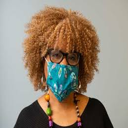

In [25]:
data[0]

In [26]:
type(data[0])

numpy.ndarray

In [27]:
data[0].shape

(128, 128, 3)

In [28]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [29]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [30]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [31]:
print(Y) #it contains all the labels

[1 1 1 ... 0 0 0]


**Train Test Split**

In [32]:
# create the four variables.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [34]:
# scaling the data
#range :- 0-1

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 80, 112, 101],
        [ 36,  67,  55],
        [ 40,  70,  57],
        ...,
        [ 38,  55,  43],
        [ 37,  57,  48],
        [ 27,  49,  41]],

       [[ 78, 111,  90],
        [ 20,  53,  32],
        [ 54,  86,  66],
        ...,
        [ 18,  35,  23],
        [ 21,  44,  32],
        [ 19,  45,  34]],

       [[ 55,  89,  65],
        [ 26,  60,  37],
        [ 51,  83,  62],
        ...,
        [ 13,  30,  17],
        [ 18,  40,  27],
        [ 21,  47,  33]],

       ...,

       [[  8,  15,  39],
        [ 20,  29,  60],
        [ 30,  43,  82],
        ...,
        [  7,   9,  25],
        [  7,   4,  17],
        [ 17,  13,  24]],

       [[ 13,  13,  34],
        [ 22,  25,  49],
        [ 27,  37,  67],
        ...,
        [ 14,  13,  30],
        [ 47,  42,  55],
        [ 88,  81,  93]],

       [[ 14,  10,  30],
        [ 33,  32,  52],
        [ 50,  55,  76],
        ...,
        [ 83,  80,  97],
        [117, 109, 124],
        [113, 103, 117]]], dtype=uint8)
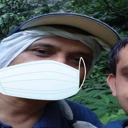

In [35]:
X_train[0]

In [36]:
X_train_scaled[0]

array([[[0.31372549, 0.43921569, 0.39607843],
        [0.14117647, 0.2627451 , 0.21568627],
        [0.15686275, 0.2745098 , 0.22352941],
        ...,
        [0.14901961, 0.21568627, 0.16862745],
        [0.14509804, 0.22352941, 0.18823529],
        [0.10588235, 0.19215686, 0.16078431]],

       [[0.30588235, 0.43529412, 0.35294118],
        [0.07843137, 0.20784314, 0.1254902 ],
        [0.21176471, 0.3372549 , 0.25882353],
        ...,
        [0.07058824, 0.1372549 , 0.09019608],
        [0.08235294, 0.17254902, 0.1254902 ],
        [0.0745098 , 0.17647059, 0.13333333]],

       [[0.21568627, 0.34901961, 0.25490196],
        [0.10196078, 0.23529412, 0.14509804],
        [0.2       , 0.3254902 , 0.24313725],
        ...,
        [0.05098039, 0.11764706, 0.06666667],
        [0.07058824, 0.15686275, 0.10588235],
        [0.08235294, 0.18431373, 0.12941176]],

       ...,

       [[0.03137255, 0.05882353, 0.15294118],
        [0.07843137, 0.11372549, 0.23529412],
        [0.11764706, 0

**Building a Convolutional Neural Networks (CNN)**

In [6]:
import tensorflow as tf
from tensorflow import keras

In [7]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten()) #reduce the dimensions , maybe into the vector(1D)

model.add(keras.layers.Dense(128, activation='relu')) #128 = TOTAL NO OF NEURONS
model.add(keras.layers.Dropout(0.5)) #to avoid the issue of overfitting

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [8]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [37]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 25ms/step - loss: 0.5667 - acc: 0.7203 - val_loss: 0.2691 - val_acc: 0.8909
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2990 - acc: 0.8841 - val_loss: 0.2712 - val_acc: 0.8843
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2547 - acc: 0.8952 - val_loss: 0.2864 - val_acc: 0.8760
Epoch 4/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2071 - acc: 0.9187 - val_loss: 0.2045 - val_acc: 0.9240
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1833 - acc: 0.9272 - val_loss: 0.1793 - val_acc: 0.9273


**Model Evaluation**

In [38]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.1977 - acc: 0.9305
Test Accuracy = 0.9305095672607422


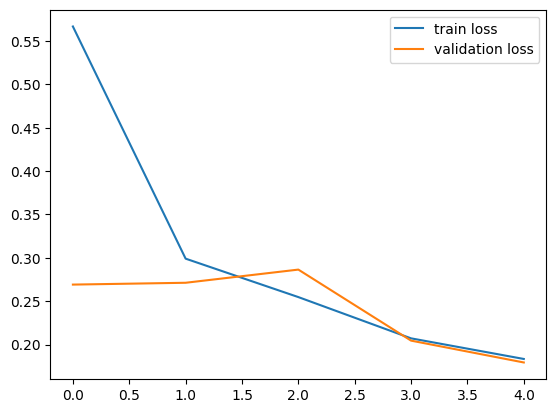

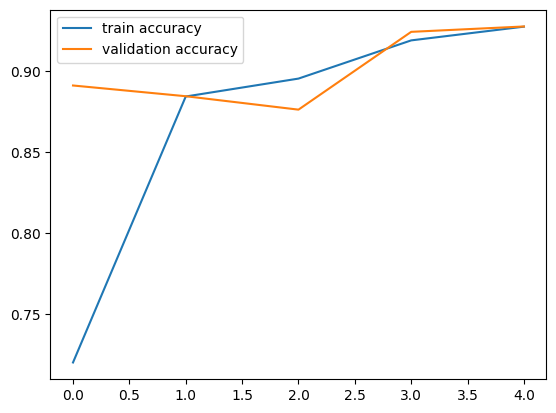

In [39]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /test.mask.1.jpg


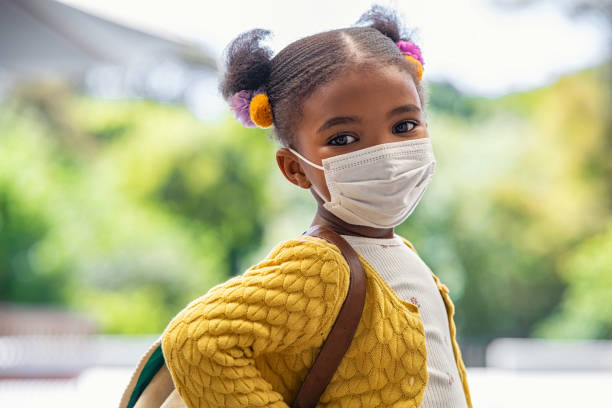

1/1 [==============================] - 0s 44ms/step
[[0.1763635  0.65984046]]
1
The person in the image is wearing a mask


In [41]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path) #Image here will be read as numpy array(cv2)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3]) # 1 = denotes we are predicting for only one img.

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)
# we get our o/p as probability values

input_pred_label = np.argmax(input_prediction) #converting it to our labels (0 or 1)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')